In [1]:
import cv2
import keras
from keras.applications.imagenet_utils import preprocess_input
from keras.backend.tensorflow_backend import set_session
from keras.models import Model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imread
import tensorflow as tf

from ssd import SSD300
from ssd_utils import BBoxUtility

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['image.interpolation'] = 'nearest'

np.set_printoptions(suppress=True)

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.45
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [2]:
voc_classes = ['Aeroplane', 'Bicycle', 'Bird', 'Boat', 'Bottle',
               'Bus', 'Car', 'Cat', 'Chair', 'Cow', 'Diningtable',
               'Dog', 'Horse','Motorbike', 'Person', 'Pottedplant',
               'Sheep', 'Sofa', 'Train', 'Tvmonitor']
NUM_CLASSES = len(voc_classes) + 1

In [3]:
input_shape=(300, 300, 3)
model = SSD300(input_shape, num_classes=NUM_CLASSES)
model.load_weights('weights_SSD300.hdf5', by_name=True)
bbox_util = BBoxUtility(NUM_CLASSES)

/media/puma/1406fd6e-9f82-424c-b49e-6617808e3799/kitti/SSD/ssd_keras/ssd.py:40: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same", name="conv1_1")`
  name='conv1_1')(net['input'])
/media/puma/1406fd6e-9f82-424c-b49e-6617808e3799/kitti/SSD/ssd_keras/ssd.py:44: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same", name="conv1_2")`
  name='conv1_2')(net['conv1_1'])
/media/puma/1406fd6e-9f82-424c-b49e-6617808e3799/kitti/SSD/ssd_keras/ssd.py:46: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), strides=(2, 2), padding="same", name="pool1")`
  name='pool1')(net['conv1_2'])
/media/puma/1406fd6e-9f82-424c-b49e-6617808e3799/kitti/SSD/ssd_keras/ssd.py:51: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same", name="conv2_1")`
  name='conv2_1')(net['pool1'])
/media/puma/1406fd6e-9

In [4]:
inputs = []
images = []
img_path = './pics/fish-bike.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())
img_path = './pics/cat.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())
img_path = './pics/boys.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())
img_path = './pics/car_cat.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())
img_path = './pics/car_cat2.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())
inputs = preprocess_input(np.array(inputs))

In [5]:
preds = model.predict(inputs, batch_size=1, verbose=1)

4/5 [=======================>......] - ETA: 0s

In [6]:
results = bbox_util.detection_out(preds)

In [7]:
%%time
a = model.predict(inputs, batch_size=1)
b = bbox_util.detection_out(preds)

CPU times: user 104 ms, sys: 16 ms, total: 120 ms
Wall time: 156 ms


In [77]:
def show_results(images, results):
    
    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()
    
    for i, img in enumerate(images):
        plt.imshow(img / 255.)
        currentAxis = plt.gca()
        
        # Parse the outputs.
        if len(results[i])<1: continue
        det_label = results[i][:, 0]
        det_conf = results[i][:, 1]
        det_xmin = results[i][:, 2]
        det_ymin = results[i][:, 3]
        det_xmax = results[i][:, 4]
        det_ymax = results[i][:, 5]

        # Get detections with confidence higher than 0.6.
        top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.6]

        top_conf = det_conf[top_indices]
        top_label_indices = det_label[top_indices].tolist()
        top_xmin = det_xmin[top_indices]
        top_ymin = det_ymin[top_indices]
        top_xmax = det_xmax[top_indices]
        top_ymax = det_ymax[top_indices]

        for i in range(top_conf.shape[0]):
            xmin = int(round(top_xmin[i] * img.shape[1]))
            ymin = int(round(top_ymin[i] * img.shape[0]))
            xmax = int(round(top_xmax[i] * img.shape[1]))
            ymax = int(round(top_ymax[i] * img.shape[0]))
            score = top_conf[i]
            label = int(top_label_indices[i])
            label_name = voc_classes[label - 1]
            display_txt = '{:0.2f}, {}'.format(score, label_name)
            coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
            color = colors[label]
            currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
            currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})

        plt.show()

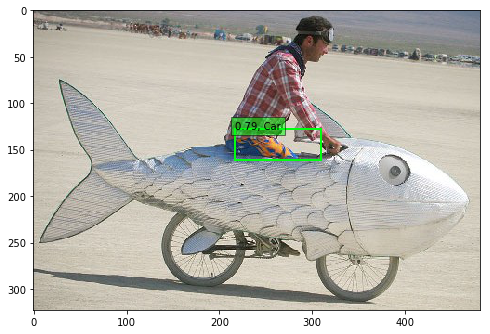

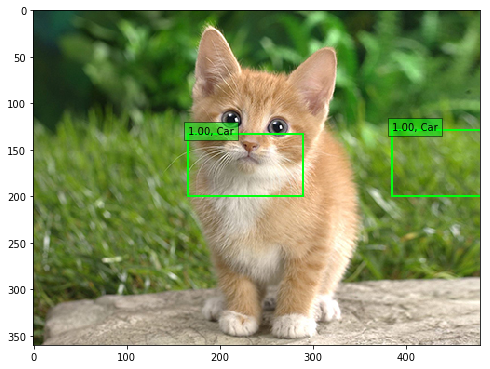

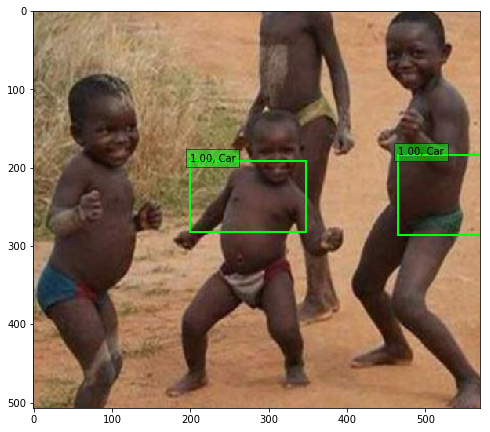

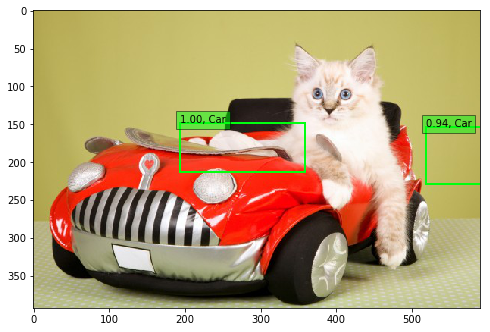

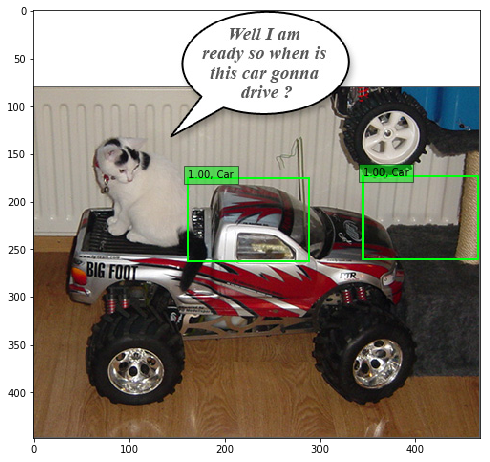

In [78]:
show_results(images, results)

# Experimenting with SSD on vehicle detection project

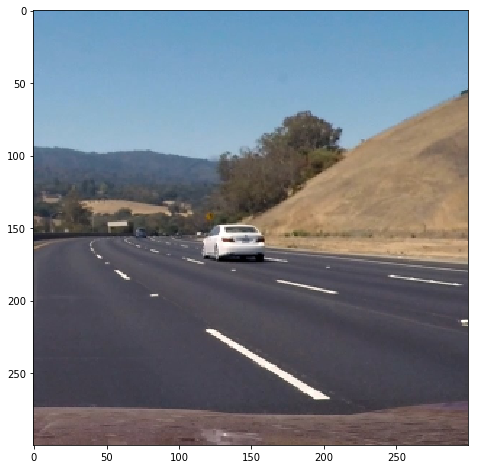

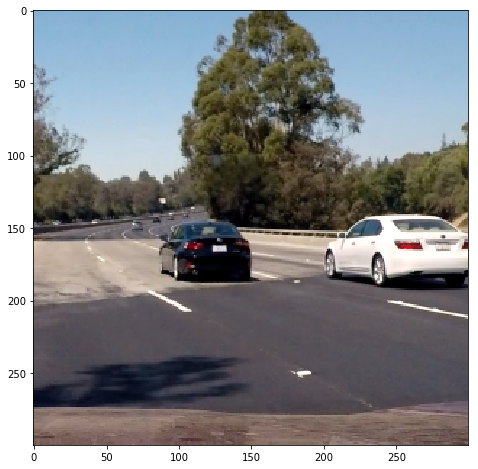

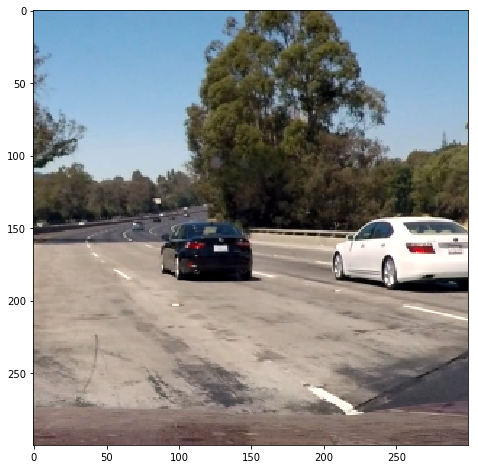

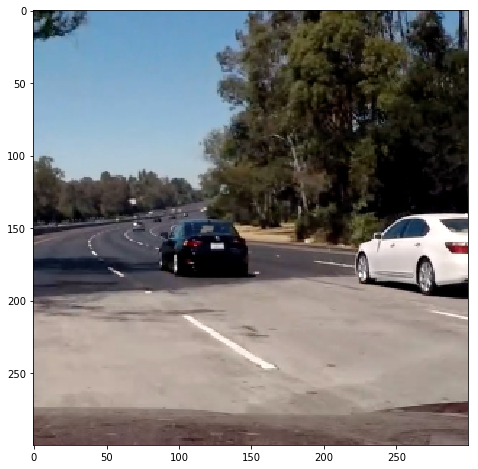

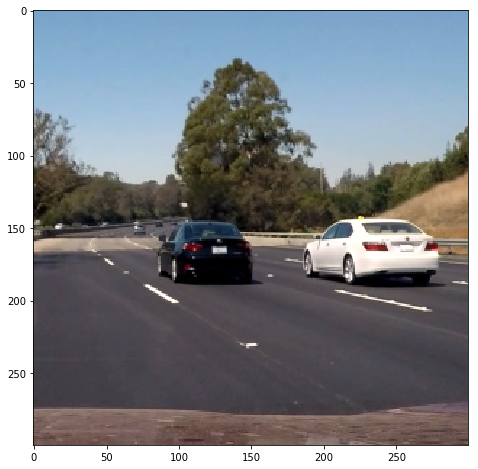

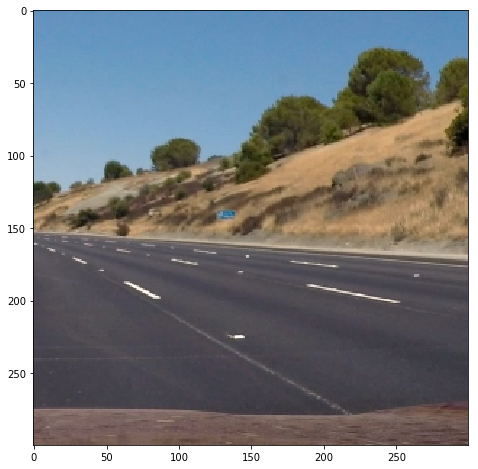

(720, 1280, 3)


In [84]:
import glob
list_image_paths = glob.glob('./test_car_images/*.jpg')
list_images = []

color = (255,0,255)

extract_size = 600

for image_path in list_image_paths:
    src_img = plt.imread(image_path)
    
    dst_img = src_img[src_img.shape[0]-extract_size:src_img.shape[0],
                      src_img.shape[1]//2:src_img.shape[1]//2+extract_size :]
    
    dst_img = cv2.resize(dst_img,(300, 300), interpolation = cv2.INTER_AREA)
    
    plt.imshow(dst_img)
    plt.show()
    list_images.append(dst_img)

print(src_img.shape)

In [85]:

inputs = preprocess_input(np.array(list_images).astype(np.float64))
preds = model.predict(inputs, batch_size=1, verbose=1)

4/6 [===================>..........] - ETA: 0s

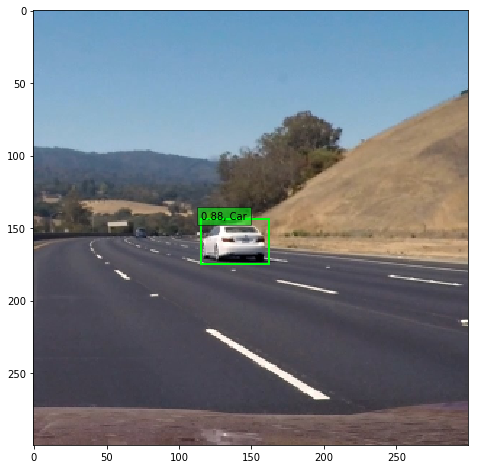

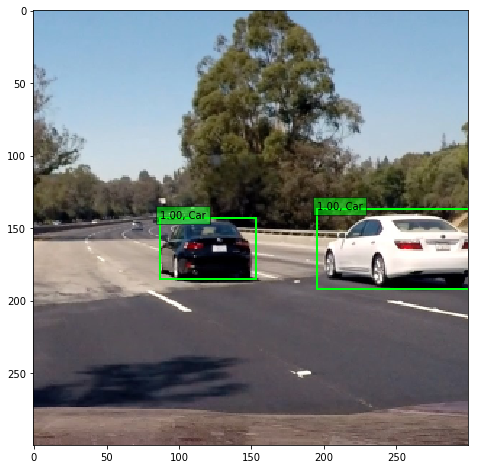

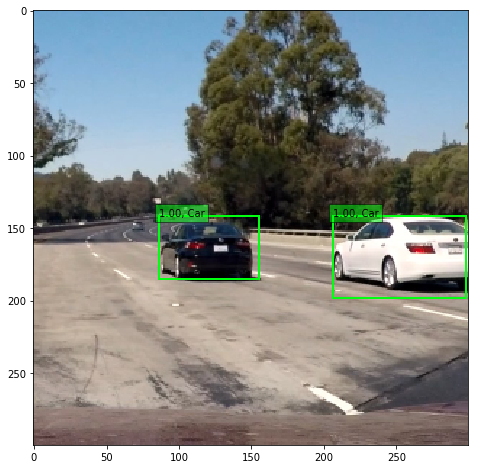

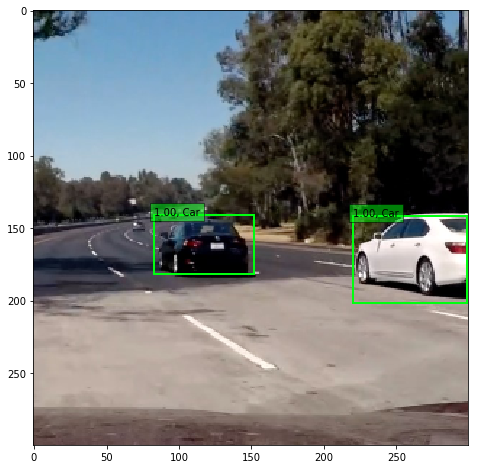

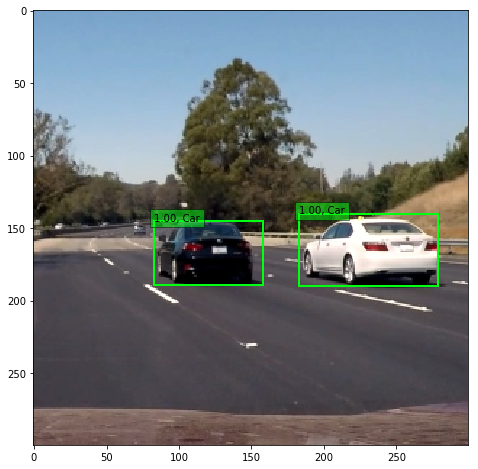

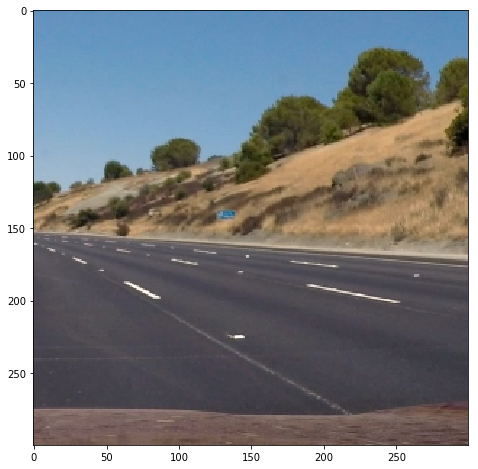

In [86]:
results = bbox_util.detection_out(preds)
show_results(list_images,results)